<a href="https://colab.research.google.com/github/jumli-gazali/diagnese/blob/jumli/Diagnese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ZIP

In [ ]:
#!wget -O Dataset.zip https://raw.githubusercontent.com/jumli-gazali/diagnese/blob/main/Dataset.zip
import zipfile

# Unzip the archive
local_zip = './Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

#1. Import Library

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf

#2. Download dan Load Dataset

In [38]:
!wget -O Training.csv https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Training.csv
!wget -O Testing.csv https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Testing.csv
!wget -O Deskripsi_dan_Dokter.csv https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Deskripsi_dan_Dokter.csv

--2023-06-03 12:29:46--  https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359835 (1.3M) [text/plain]
Saving to: ‘Training.csv’

Training.csv        100%[===================>]   1.30M  --.-KB/s    in 0.06s   

2023-06-03 12:29:46 (22.1 MB/s) - ‘Training.csv’ saved [1359835/1359835]

--2023-06-03 12:29:46--  https://raw.githubusercontent.com/jumli-gazali/diagnese/main/Testing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13588 (13K) [text/plain]
Saving t

In [39]:
#read training data csv with header = 0 and delimiter = ;
df = pd.read_csv('Training.csv', header=0, delimiter=';')
test_df = pd.read_csv('Testing.csv', header=0, delimiter=';')

In [40]:
df = pd.concat([df, test_df])

In [ ]:
df = pd.concat([df] + [test_df] * 4)

#3. Data Exploration

In [ ]:
#check dimension data
#train_df.shape
df.shape, test_df.shape

((5084, 132), (41, 132))

In [ ]:
#check empty cell
data_train = pd.DataFrame(df)

# Memeriksa apakah terdapat sel yang tidak berisi (NULL/NaN)
cek_null = data_train.isnull().any().any()

if cek_null:
    print("Terdapat sel yang tidak berisi dalam DataFrame.")
else:
    print("Tidak terdapat sel yang tidak berisi dalam DataFrame.")

Tidak terdapat sel yang tidak berisi dalam DataFrame.


In [ ]:
#check empty cell
data_test = pd.DataFrame(test_df)

# Memeriksa apakah terdapat sel yang tidak berisi (NULL/NaN)
cek_null = data_test.isnull().any().any()

if cek_null:
    print("Terdapat sel yang tidak berisi dalam DataFrame.")
else:
    print("Tidak terdapat sel yang tidak berisi dalam DataFrame.")

Tidak terdapat sel yang tidak berisi dalam DataFrame.


In [ ]:
df.isnull().sum()

gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
prognosis                       0
Length: 132, dtype: int64

In [ ]:
test_df.isnull().sum()

gatal                           1
ruam_kulit                      1
benjolan_pada_kulit             1
bersin-bersin                   1
menggigil                       1
                               ..
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
prognosis                       0
Length: 132, dtype: int64

In [ ]:
#check 5 head data
df.head(5)

,gatal,ruam_kulit,benjolan_pada_kulit,bersin-bersin,menggigil,merinding,nyeri_sendi,sakit_perut,asam_lambung,sariawan,...,komedo,menggaruk,pengelupasan_kulit,kulit_bersisik,celah_kecil_pada_kuku,peradangan_kuku,kulit_melepuh,luka_merah_di_sekitar_hidung,bekas_luka_berair,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal


In [ ]:
#check 5 head data
test_df.head(5)

,gatal,ruam_kulit,benjolan_pada_kulit,bersin-bersin,menggigil,merinding,nyeri_sendi,sakit_perut,asam_lambung,sariawan,...,komedo,menggaruk,pengelupasan_kulit,kulit_bersisik,celah_kecil_pada_kuku,peradangan_kuku,kulit_melepuh,luka_merah_di_sekitar_hidung,bekas_luka_berair,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
1,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Jerawat
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis Alkoholik
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alergi


In [ ]:
#get summary from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, gatal to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 132 entries, gatal to prognosis
dtypes: int64(131), object(1)
memory usage: 42.4+ KB


In [ ]:
col_names = df.columns
for col in col_names:
    
    print(df[col].value_counts())   

0    4242
1     678
Name: gatal, dtype: int64
0    4134
1     786
Name: ruam_kulit, dtype: int64
0    4812
1     108
Name: benjolan_pada_kulit, dtype: int64
0    4698
1     222
Name: bersin-bersin, dtype: int64
0    4812
1     108
Name: menggigil, dtype: int64
0    4122
1     798
Name: merinding, dtype: int64
0    4236
1     684
Name: nyeri_sendi, dtype: int64
0    4698
1     222
Name: sakit_perut, dtype: int64
0    4698
1     222
Name: asam_lambung, dtype: int64
0    4812
1     108
Name: sariawan, dtype: int64
0    4812
1     108
Name: otot_mengecil, dtype: int64
0    3006
1    1914
Name: muntah, dtype: int64
0    4704
1     216
Name: panas_saat_buang_air_kecil, dtype: int64
0    4812
1     108
Name: keluar_darah_buang_air_kecil, dtype: int64
0    2988
1    1932
Name: kelelahan, dtype: int64
0    4806
1     114
Name: kenaikan_berat_badan, dtype: int64
0    4806
1     114
Name: anxiety, dtype: int64
0    4806
1     114
Name: tangan_dan_kaki_dingin, dtype: int64
0    4692
1     228
Name

In [ ]:
col_names = test_df.columns
for col in col_names:
    
    print(test_df[col].value_counts())   

0    35
1     6
Name: gatal, dtype: int64
0    34
1     7
Name: ruam_kulit, dtype: int64
0    40
1     1
Name: benjolan_pada_kulit, dtype: int64
0    39
1     2
Name: bersin-bersin, dtype: int64
0    40
1     1
Name: menggigil, dtype: int64
0    34
1     7
Name: merinding, dtype: int64
0    35
1     6
Name: nyeri_sendi, dtype: int64
0    39
1     2
Name: sakit_perut, dtype: int64
0    39
1     2
Name: asam_lambung, dtype: int64
0    40
1     1
Name: sariawan, dtype: int64
0    40
1     1
Name: otot_mengecil, dtype: int64
0    24
1    17
Name: muntah, dtype: int64
0    39
1     2
Name: panas_saat_buang_air_kecil, dtype: int64
0    40
1     1
Name: keluar_darah_buang_air_kecil, dtype: int64
0    24
1    17
Name: kelelahan, dtype: int64
0    40
1     1
Name: kenaikan_berat_badan, dtype: int64
0    40
1     1
Name: anxiety, dtype: int64
0    40
1     1
Name: tangan_dan_kaki_dingin, dtype: int64
0    39
1     2
Name: perubahan_suasana_hati, dtype: int64
0    37
1     4
Name: penurunan_berat

<ipython-input-16-b007c248b392>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


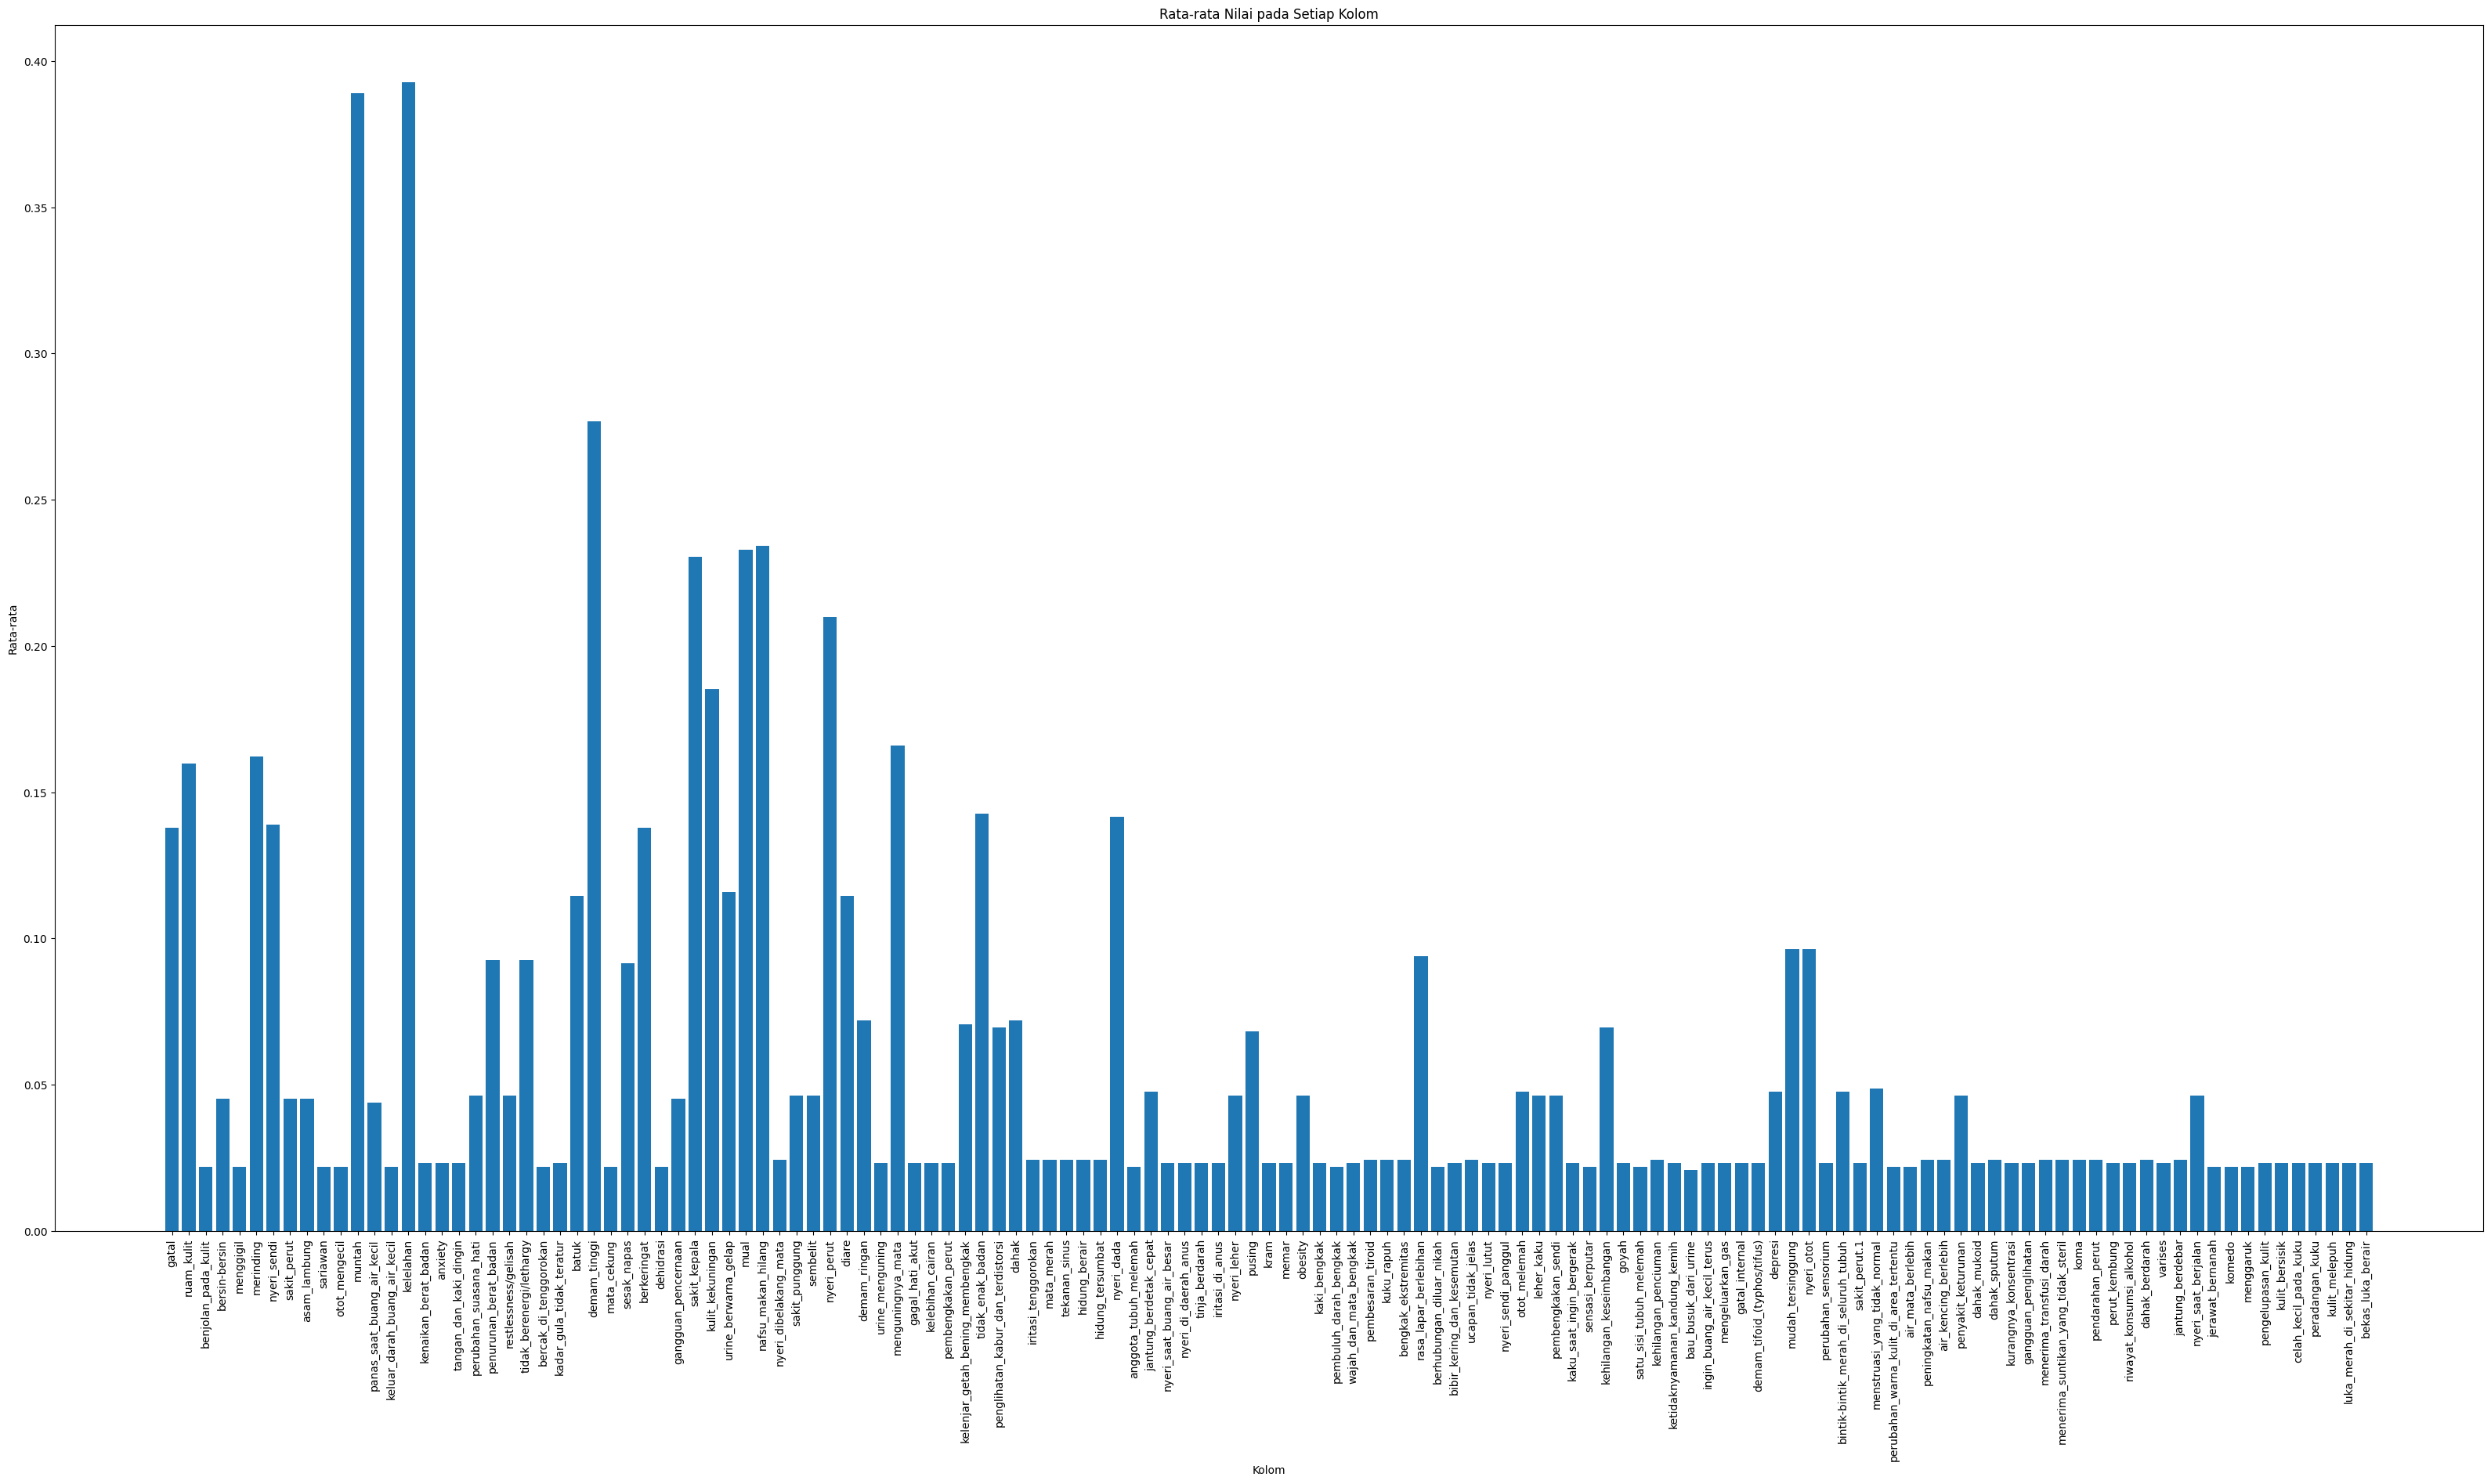

In [ ]:
import matplotlib.pyplot as plt

# Menghitung rata-rata setiap kolom
mean_values = df.mean()

# Membuat gambar
plt.figure(figsize=(40, 20))
plt.bar(mean_values.index, mean_values.values)
plt.title("Rata-rata Nilai pada Setiap Kolom")
plt.xlabel("Kolom")
plt.ylabel("Rata-rata")
plt.xticks(rotation=90)  # Rotasi label sumbu x agar tidak tumpang tindih
plt.show()


<ipython-input-17-3b14e2c84d9e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = test_df.mean()


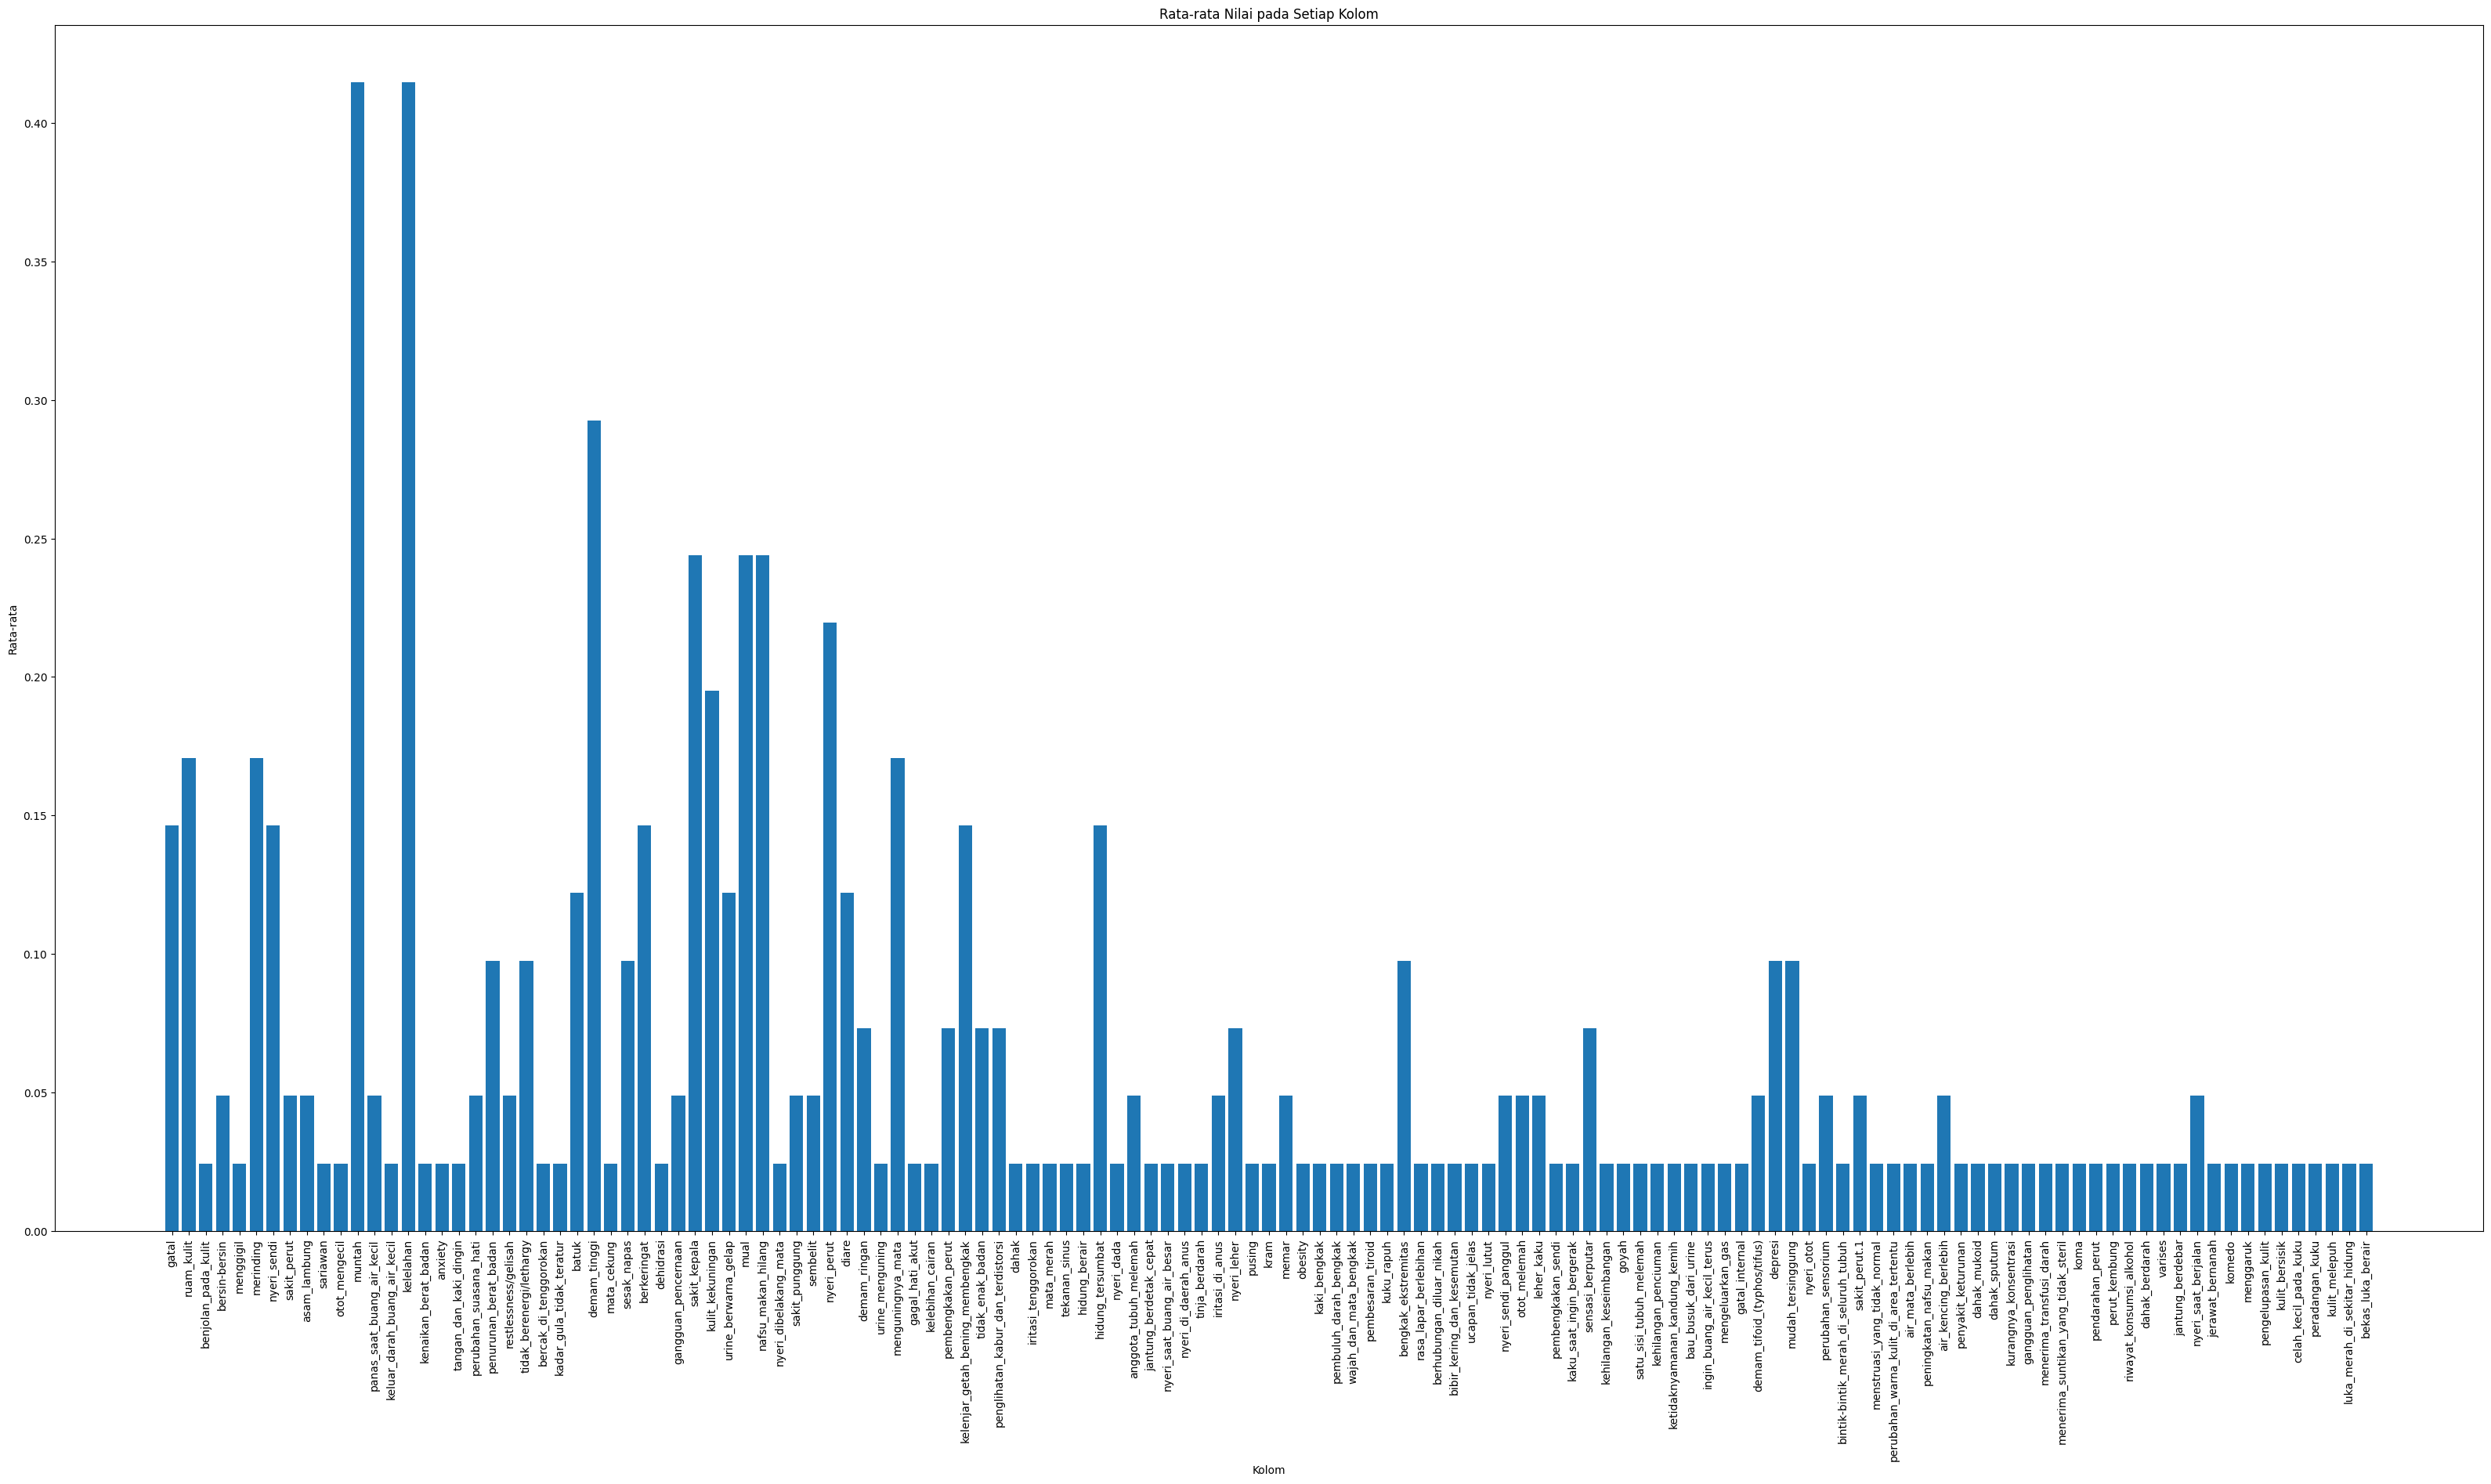

In [ ]:
import matplotlib.pyplot as plt

# Menghitung rata-rata setiap kolom
mean_values = test_df.mean()

# Membuat gambar
plt.figure(figsize=(40, 20))
plt.bar(mean_values.index, mean_values.values)
plt.title("Rata-rata Nilai pada Setiap Kolom")
plt.xlabel("Kolom")
plt.ylabel("Rata-rata")
plt.xticks(rotation=90)  # Rotasi label sumbu x agar tidak tumpang tindih
plt.show()

In [ ]:
df['prognosis'].value_counts()

Vertigo Posisional Paroksismal    120
Hepatitis C                       120
Hepatitis E                       120
Hipertensi                        120
Hipertiroidisme                   120
Hipoglikemia                      120
Hipotiroidisme                    120
Impetigo                          120
Kuning (penyakit kuning)          120
Malaria                           120
Migraine                          120
Osteoartritis                     120
Paralisis (pendarahan otak)       120
Penyakit ulkus peptikum           120
Pneumonia                         120
Psoriasis                         120
Tuberculosis                      120
Typus                             120
Infeksi saluran kemih             120
Hepatitis D                       120
Hepatitis B                       120
Jerawat                           120
hepatitis A                       120
AIDS                              120
Hepatitis Alkoholik               120
Alergi                            120
Artritis    

#Split data

Declare Prognosis as a target class

In [ ]:
X_train = df.drop(['prognosis'], axis=1)
y_train = df['prognosis']

In [ ]:
X_val = test_df.drop(['prognosis'], axis=1)
y_val = test_df['prognosis']
X_test = X_val
y_test = y_val

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3968, 131), (993, 131))

In [ ]:
features = [x for x in df.columns if x not in 'prognosis'] ## Removing our target variable
# Separate features and target variable in testing dataset
X_test = test_df.drop('prognosis', axis=1)  # Features
y_test = test_df['prognosis']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42  # Set the random seed for reproducibility
X_train, X_val, y_train, y_val = train_test_split(df[features], df['prognosis'], train_size = 0.8, random_state = RANDOM_STATE)

In [ ]:
print("Data types:")
print("X_train:", type(X_train))
print("X_val:", type(X_val))
print("X_test:", type(X_test))
print("y_train:", type(y_train))
print("y_val:", type(y_train))
print("y_test:", type(y_test))

Data types:
X_train: <class 'pandas.core.frame.DataFrame'>
X_val: <class 'pandas.core.frame.DataFrame'>
X_test: <class 'pandas.core.frame.DataFrame'>
y_train: <class 'pandas.core.series.Series'>
y_val: <class 'pandas.core.series.Series'>
y_test: <class 'pandas.core.series.Series'>


In [ ]:
X_train.shape, X_val.shape, X_test.shape

((3968, 131), (993, 131), (41, 131))

#Decision Tree

In [ ]:
min_samples_split_list = [2, 5, 10, 20, 30, 40, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 40, 50, 55, 64, 100, None] # None means that there is no depth limit.

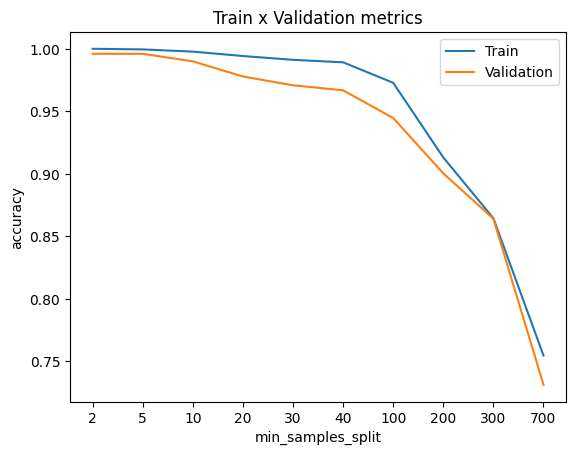

In [ ]:
# import DecisionTreeClassifier
RANDOM_STATE = 42
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(criterion='gini', min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

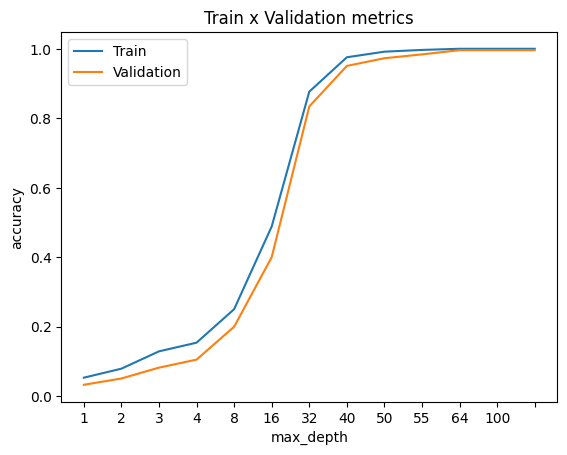

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(criterion='gini', max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', 
                                             min_samples_split = 10,
                                             max_depth = 40,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
predictions_test = decision_tree_model.predict(X_test)
accuracy_test = accuracy_score(predictions_test, y_test)
print(f"Metrics test:\n\tAccuracy score: {accuracy_test:.4f}")

Metrics train:
	Accuracy score: 0.9879
Metrics validation:
	Accuracy score: 0.9607
Metrics test:
	Accuracy score: 0.7805


In [ ]:
import joblib
# Menyimpan model dalam format H5 menggunakan joblib
joblib.dump(decision_tree_model, 'decision_tree_model.h5')
# Mengonversi model ke format TensorFlow.js
tfjs.converters.save_keras_model(decision_tree_model, 'tfjs_model')

AttributeError: ignored

In [ ]:
#!pip install sklearn-porter tensorflowjs
import tensorflowjs as tfjs

# Simpan model ke direktori output TF.js
tfjs.converters.save_keras_model(decision_tree_model, 'tfjs_model')

AttributeError: ignored

#NEURAL NETWORK

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah label menjadi angka
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
list(label_encoder.classes_)

['AIDS',
 'Alergi',
 'Artritis',
 'Asma Bronkial',
 'Cacar air',
 'Demam berdarah',
 'Diabetes',
 'GERD',
 'Gastroenteritis',
 'Hemoroid dimorfik (ambeien)',
 'Hepatitis A',
 'Hepatitis Alkoholik',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hipertensi',
 'Hipertiroidisme',
 'Hipoglikemia',
 'Hipotiroidisme',
 'Impetigo',
 'Infeksi jamur',
 'Infeksi saluran kemih',
 'Jerawat',
 'Kolestasis kronis',
 'Kuning (penyakit kuning)',
 'Malaria',
 'Migraine',
 'Osteoartritis',
 'Paralisis (pendarahan otak)',
 'Penyakit ulkus peptikum',
 'Pilek biasa',
 'Pneumonia',
 'Psoriasis',
 'Reaksi obat',
 'Serangan jantung',
 'Spondilosis Serviks',
 'Tuberculosis',
 'Typus',
 'Varises',
 'Vertigo Posisional Paroksismal']

In [ ]:
class AccuracyThresholdCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= 0.95:
            print(f"\nReached validation accuracy of 0.95 or higher. Stopping training.")
            self.model.stop_training = True

# Early stopping based on validation accuracy threshold
accuracy_threshold_callback = AccuracyThresholdCallback()

# Melatih model dengan early stopping
#model.fit(X_train, y_train_encoded, epochs=10, batch_size=13, validation_data=(X_val, y_val_encoded), callbacks=[accuracy_threshold_callback])

NameError: ignored

In [ ]:
import tensorflow as tf
from keras.layers.core import Dropout


# Membangun model neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])


# Mengatur learning rate
learning_rate = 0.01

# Mengkompilasi model dengan optimizer yang sudah ditentukan
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Melatih model
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=13, verbose=2, validation_data=(X_val, y_val_encoded))

Epoch 1/20
306/306 - 2s - loss: 3.6101 - accuracy: 0.0660 - val_loss: 3.3977 - val_accuracy: 0.2135 - 2s/epoch - 5ms/step
Epoch 2/20
306/306 - 1s - loss: 3.2459 - accuracy: 0.2497 - val_loss: 3.0331 - val_accuracy: 0.5599 - 635ms/epoch - 2ms/step
Epoch 3/20
306/306 - 1s - loss: 2.8850 - accuracy: 0.4718 - val_loss: 2.6169 - val_accuracy: 0.7875 - 647ms/epoch - 2ms/step
Epoch 4/20
306/306 - 1s - loss: 2.4885 - accuracy: 0.6278 - val_loss: 2.1712 - val_accuracy: 0.8761 - 965ms/epoch - 3ms/step
Epoch 5/20
306/306 - 3s - loss: 2.0847 - accuracy: 0.7379 - val_loss: 1.7465 - val_accuracy: 0.9778 - 3s/epoch - 8ms/step
Epoch 6/20
306/306 - 3s - loss: 1.7339 - accuracy: 0.8158 - val_loss: 1.3710 - val_accuracy: 0.9970 - 3s/epoch - 9ms/step
Epoch 7/20
306/306 - 2s - loss: 1.4442 - accuracy: 0.8606 - val_loss: 1.0605 - val_accuracy: 0.9980 - 2s/epoch - 6ms/step
Epoch 8/20
306/306 - 1s - loss: 1.1882 - accuracy: 0.8942 - val_loss: 0.8132 - val_accuracy: 0.9980 - 1s/epoch - 4ms/step
Epoch 9/20
306/

In [ ]:
# Evaluasi model pada data train
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded)
print(f"Metrics train:\n\tAccuracy score: {train_accuracy:.4f}")

# Evaluasi model pada data validasi
val_loss, val_accuracy = model.evaluate(X_val, y_val_encoded)
print(f"Metrics validation:\n\tAccuracy score: {val_accuracy:.4f}")

# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Metrics test:\n\tAccuracy score: {test_accuracy:.4f}")

124/124 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.9997
Metrics train:
	Accuracy score: 0.9997
32/32 [==============================] - 0s 4ms/step - loss: 0.0782 - accuracy: 0.9990
Metrics validation:
	Accuracy score: 0.9990
2/2 [==============================] - 0s 15ms/step - loss: 0.3412 - accuracy: 0.9512
Metrics test:
	Accuracy score: 0.9512


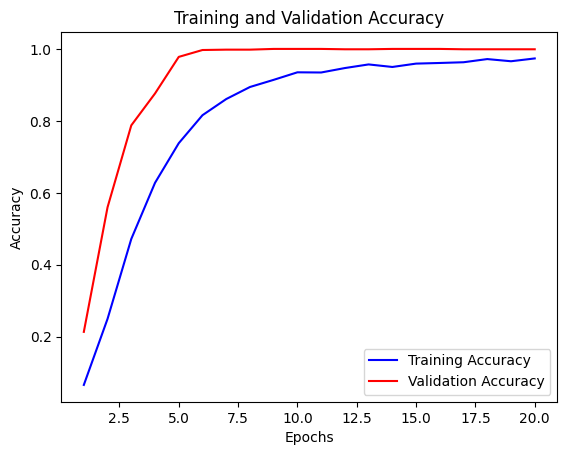

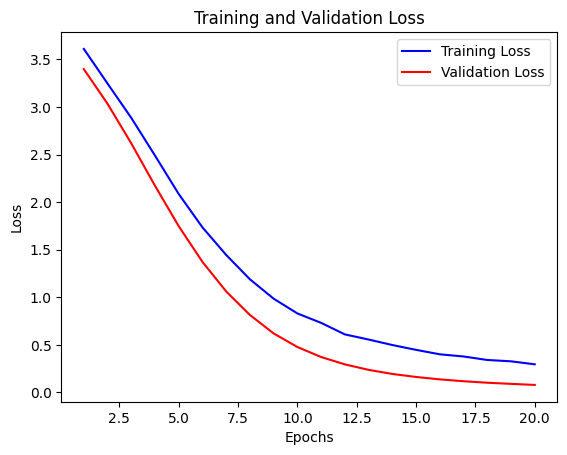

In [ ]:
# Mengambil metrik pelatihan
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat grafik
epochs = range(1, len(train_accuracy) + 1)

# Grafik akurasi
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafik loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah label menjadi angka
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
list(label_encoder.classes_)

['AIDS',
 'Alergi',
 'Artritis',
 'Asma Bronkial',
 'Cacar air',
 'Demam berdarah',
 'Diabetes',
 'GERD',
 'Gastroenteritis',
 'Hemoroid dimorfik (ambeien)',
 'Hepatitis A',
 'Hepatitis Alkoholik',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hipertensi',
 'Hipertiroidisme',
 'Hipoglikemia',
 'Hipotiroidisme',
 'Impetigo',
 'Infeksi jamur',
 'Infeksi saluran kemih',
 'Jerawat',
 'Kolestasis kronis',
 'Kuning (penyakit kuning)',
 'Malaria',
 'Migraine',
 'Osteoartritis',
 'Paralisis (pendarahan otak)',
 'Penyakit ulkus peptikum',
 'Pilek biasa',
 'Pneumonia',
 'Psoriasis',
 'Reaksi obat',
 'Serangan jantung',
 'Spondilosis Serviks',
 'Tuberculosis',
 'Typus',
 'Varises',
 'Vertigo Posisional Paroksismal']

In [ ]:
label_encoder.transform(y_test)

array([40, 23,  0, 11,  1,  2,  3, 36,  4, 24, 31,  5,  6,  9, 34, 21,  8,
        7, 35, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29,
       30, 32, 33, 37, 38, 22, 39])

In [ ]:
# Melakukan prediksi menggunakan model
predictions_test_prob = model.predict(X_test)
#predictions_test = np.argmax(predictions_test_prob, axis=1)
#predictions_test = model.predict(X_test)
for index, row in X_test.iterrows():
    input_data = row  # Mengambil data input dari setiap baris
    prediction_prob = predictions_test_prob[index]  # Mengambil probabilitas prediksi untuk data input
    max_prob_index = np.argmax(prediction_prob)  # Menemukan indeks probabilitas tertinggi
    max_prob_label = label_encoder.classes_[max_prob_index]  # Menemukan label kelas dengan probabilitas tertinggi
    max_prob = prediction_prob[max_prob_index]  # Mengambil probabilitas tertinggi
    actual_label = y_test[index]  # Mengambil label aktual dari y_test
    print(f"Input: {input_data}, Prediction: {max_prob_label} ({max_prob}), Actual Label: {actual_label}")
    #print(f"Input: {input_data}, Prediction: {max_prob_label}, Actual Label: {actual_label}")

2/2 [==============================] - 0s 7ms/step
Input: gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
celah_kecil_pada_kuku           0
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
Name: 0, Length: 131, dtype: int64, Prediction: Vertigo Posisional Paroksismal (0.8832189440727234), Actual Label: Vertigo Posisional Paroksismal
Input: gatal                           0
ruam_kulit                      1
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
celah_kecil_pada_kuku           0
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
Name: 1, Length: 131, dtype: int64, Predi

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Menghasilkan prediksi pada data validasi
y_pred = model.predict(X_val)
y_pred = np.argmax(model.predict(X_val), axis=-1)

# Mencetak classification report
report = classification_report(y_val_encoded, y_pred)
print(report)

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        19
          16       1.00     

#Deskripsi dan Spesialis

In [ ]:
import csv
def deskripsi_dan_dokter(prediksi):
    with open('Deskripsi_dan_Dokter.csv') as file:
        prognosis = csv.DictReader(file)
        for row in prognosis:
            if row['Prognosis'] == prediksi:
                return row['Deskripsi'], row['Spesialis']
    return "Penyakit tidak dikenali", "Tidak ada spesialis yang sesuai"

In [ ]:
#contoh input 
input_data = X_test.iloc[1]

# Mengubah input data menjadi bentuk yang sesuai untuk prediksi
input_data = np.array([input_data])

predictions_prob = model.predict(input_data)
max_prob_index = np.argmax(predictions_prob)  # Menemukan indeks probabilitas tertinggi
max_prob_label = label_encoder.classes_[max_prob_index]  # Menemukan label kelas dengan probabilitas tertinggi
print("Prognosis:", max_prob_label)

1/1 [==============================] - 0s 24ms/step
Prognosis: Jerawat


In [ ]:
# Contoh penggunaan
prediksi = max_prob_label
deskripsi, dokter_spesialis = deskripsi_dan_dokter(prediksi)

print("Deskripsi:", deskripsi)
print("Rekomendasi dokter: Dokter", dokter_spesialis)

Deskripsi: Kondisi kulit yang ditandai dengan peradangan pada folikel rambut dan kelenjar minyak di kulit.
Rekomendasi dokter: Dokter Spesialis Kulit dan Kelamin


#Model Save

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')
import os
# Pindah ke direktori yang diinginkan
os.chdir('/content/gdrive/MyDrive/Capstone Bangkit')


Mounted at /content/gdrive


In [ ]:
import time
# Generate a unique filename based on the current time
current_time = time.strftime("%Y%m%d-%H%M%S")
model_filename = f"model_{current_time}.h5"

In [ ]:
# Save the Keras model
model.save(model_filename)
#model.save('model.h5')

In [ ]:
!pip install tensorflowjs

import tensorflowjs as tfjs

# Simpan model ke direktori output TF.js
#tfjs.converters.save_keras_model(model, 'tfjs_model')
output_directory = f"tfjs_model_{current_time}"

# Save model to TF.js format in the output directory
tfjs.converters.save_keras_model(model, output_directory)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
# Convert model to TF Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save model to file
tflite_filename = f"model_{current_time}.tflite"
with open(tflite_filename, 'wb') as f:
    f.write(tflite_model)

In [ ]:
predictions_test = model.predict(X_test)

for index, row in X_test.iterrows():
    input_data = row  # Mengambil data input dari setiap baris
    prediction_prob = predictions_test_prob[index]  # Mengambil probabilitas prediksi untuk data input
    prediction = {label_encoder.classes_[i]: prob for i, prob in enumerate(prediction_prob)}
    actual_label = y_test[index]  # Mengambil label aktual dari y_test
    print(f"Input: {input_data}, Prediction: {prediction}, Actual Label: {actual_label}")


2/2 [==============================] - 0s 2ms/step
Input: gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
celah_kecil_pada_kuku           0
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
Name: 0, Length: 131, dtype: int64, Prediction: {'AIDS': 2.5053475e-06, 'Alergi': 8.22729e-07, 'Artritis': 1.16446345e-05, 'Asma Bronkial': 0.0004860659, 'Cacar air': 1.7577895e-05, 'Demam berdarah': 1.11896325e-05, 'Diabetes': 3.5085648e-06, 'GERD': 5.391945e-06, 'Gastroenteritis': 3.233267e-05, 'Hemoroid dimorfik (ambeien)': 5.551335e-07, 'Hepatitis A': 9.852348e-05, 'Hepatitis Alkoholik': 1.3280745e-05, 'Hepatitis B': 9.247545e-07, 'Hepatitis C': 0.0002920374, 'Hepatitis D': 8.012714e-05, 'Hepatitis E': 0.00013763437, 'Hipertensi': 0.0016369515, 'Hipertiroidi

In [ ]:
# Menyimpan model ke file
import joblib
joblib.dump(model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [ ]:
tensorflowjs_converter --input_format joblib --output_format tfjs_graph_model decision_tree_model.joblib tfjs_model

SyntaxError: ignored

In [ ]:
# Memuat model dari file model.json
loaded_model = tf.keras.models.load_model('/content/model.json')

# Menampilkan ringkasan model
loaded_model.summary()

OSError: ignored

In [ ]:
min_samples_split_list = [100, 200, 300, 700, 1000, 1500, 2000]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500,1000,1500,2000,5000]

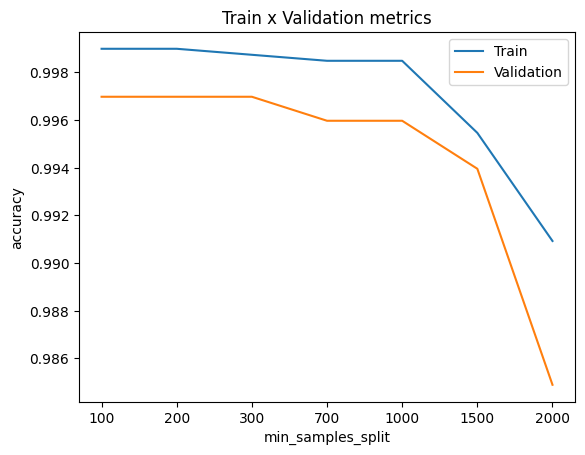

In [ ]:
from sklearn.ensemble import RandomForestClassifier
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(criterion='gini', min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

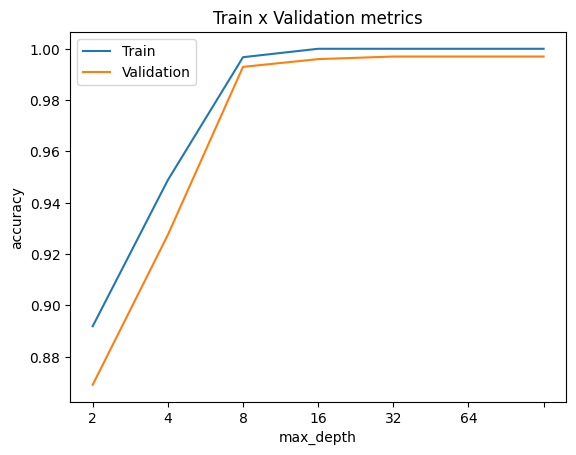

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

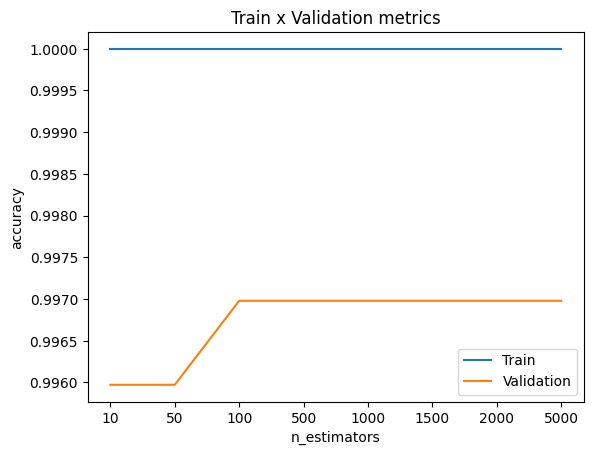

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 8, 
                                             min_samples_split = 300).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")
predictions_test = decision_tree_model.predict(X_test)
accuracy_test = accuracy_score(predictions_test, y_test)
print(f"Metrics test:\n\tAccuracy score: {accuracy_test:.4f}")                                          

Metrics train:
	Accuracy score: 0.9953
Metrics test:
	Accuracy score: 0.9899
Metrics test:
	Accuracy score: 0.9024


In [ ]:
predictions_test = random_forest_model.predict(X_test)

for index, row in X_test.iterrows():
    input_data = row  # Mengambil data input dari setiap baris
    prediction = predictions_test[index]  # Mengambil hasil prediksi untuk data input
    actual_label = y_test[index]  # Mengambil label aktual dari y_test
    print(f"Input: {input_data}, Prediction: {prediction}, Actual Label: {actual_label}")

Input: gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
celah_kecil_pada_kuku           0
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
Name: 0, Length: 131, dtype: int64, Prediction: Artritis, Actual Label: Vertigo Posisional Paroksismal
Input: gatal                           0
ruam_kulit                      1
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
celah_kecil_pada_kuku           0
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
Name: 1, Length: 131, dtype: int64, Prediction: Hepatitis C, Actual Label: Jerawat
Input: gatal                           0
ruam_kulit 

#Decision Tree

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4878


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.4878


In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6341


In [ ]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Menggunakan LabelEncoder untuk mengonversi nilai string ke nilai numerik
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

ValueError: ignored

In [ ]:
from keras.utils import to_categorical
# Konversi target menjadi one-hot encoding
num_classes = 41  # Jumlah kelas yang ada
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Membuat DataFrame dari array y_test_encoded
df_y_test_encoded = pd.DataFrame(y_test_encoded)

ValueError: ignored

In [ ]:
# Membuat DataFrame dari array y_test_encoded
df_y_test_encoded = pd.DataFrame(y_test_encoded)

# Menampilkan beberapa baris pertama DataFrame y_test_encoded
print(df_y_test_encoded.head(50))

     0    1    2    3    4    5    6    7    8    9   ...   31   32   33   34  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
8   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

# Create the neural network
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(41, activation="softmax"))

# Compile the model with specified learning rate
learning_rate = 0.004
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=learning_rate), metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
#accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_encoded, axis=1))

#print("Accuracy:", accuracy)

Epoch 1/20
108/108 [==============================] - 1s 4ms/step - loss: 3.6971 - accuracy: 0.0250
Epoch 2/20
108/108 [==============================] - 0s 3ms/step - loss: 3.6658 - accuracy: 0.0749
Epoch 3/20
108/108 [==============================] - 0s 4ms/step - loss: 3.6351 - accuracy: 0.1841
Epoch 4/20
108/108 [==============================] - 0s 4ms/step - loss: 3.6034 - accuracy: 0.3011
Epoch 5/20
108/108 [==============================] - 0s 4ms/step - loss: 3.5704 - accuracy: 0.3807
Epoch 6/20
108/108 [==============================] - 0s 4ms/step - loss: 3.5344 - accuracy: 0.4422
Epoch 7/20
108/108 [==============================] - 0s 4ms/step - loss: 3.4941 - accuracy: 0.5395
Epoch 8/20
108/108 [==============================] - 0s 4ms/step - loss: 3.4486 - accuracy: 0.6190
Epoch 9/20
108/108 [==============================] - 0s 3ms/step - loss: 3.3963 - accuracy: 0.6611
Epoch 10/20
108/108 [==============================] - 0s 3ms/step - loss: 3.3362 - accuracy: 0.6780

In [ ]:
import pandas as pd
import numpy as np

# Konversi array numpy menjadi DataFrame
X_test_df = pd.DataFrame(X_test)

# Pastikan model sudah dilatih sebelum melakukan prediksi
predictions_test = model.predict(X_test)

# Iterasi baris per baris pada DataFrame X_test_df
for index, row in X_test_df.iterrows():
    input_data = row  # Mengambil data input dari setiap baris
    prediction = predictions_test[index]  # Mengambil hasil prediksi untuk data input
    prediction_label = np.argmax(prediction)  # Memilih kelas dengan probabilitas tertinggi
    actual_label = y_test[index]  # Mengambil label aktual dari y_test
    print(f"Input: {input_data}, Prediction: {prediction_label}, Actual Label: {actual_label}")

2/2 [==============================] - 0s 5ms/step
Input: 0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    0
130    0
Name: 0, Length: 131, dtype: int64, Prediction: 39, Actual Label: Vertigo Posisional Paroksismal
Input: 0      0
1      1
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    0
130    0
Name: 1, Length: 131, dtype: int64, Prediction: 22, Actual Label: Jerawat
Input: 0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    0
130    0
Name: 2, Length: 131, dtype: int64, Prediction: 24, Actual Label: AIDS
Input: 0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    0
130    0
Name: 3, Length: 131, dtype: int64, Prediction: 10, Actual Label: Hepatitis Alkoholik
Input: 0      0
1      0
2      0
3      1
4      1
      ..
126    0
127    0
128    0
129    0
130    0
Name: 4, Length: 131, dtype: int64, Prediction: 31, Actual Label: Alergi
Input: 0      0
1 

Mounted at /content/gdrive


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')
import os
# Pindah ke direktori yang diinginkan
os.chdir('/content/gdrive/MyDrive/Capstone Bangkit')


In [ ]:
# Simpan model menjadi file H5
decision_tree_model.save('model.h5')

AttributeError: ignored

In [ ]:
!pip install tensorflowjs

import tensorflowjs as tfjs

# Simpan model ke direktori output TF.js
tfjs.converters.save_keras_model(model, 'tfjs_model')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

AttributeError: ignored

In [ ]:
import tensorflow as tf

# Simpan model ke format TF Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TF Lite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi label menjadi bentuk 1 dimensi
y_true_labels_1d = np.argmax(y_true_labels, axis=1)

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label kategori menjadi tipe data numerik
y_true_labels_encoded = label_encoder.fit_transform(y_true_labels_1d)

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels_encoded, y_pred_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0  8]]


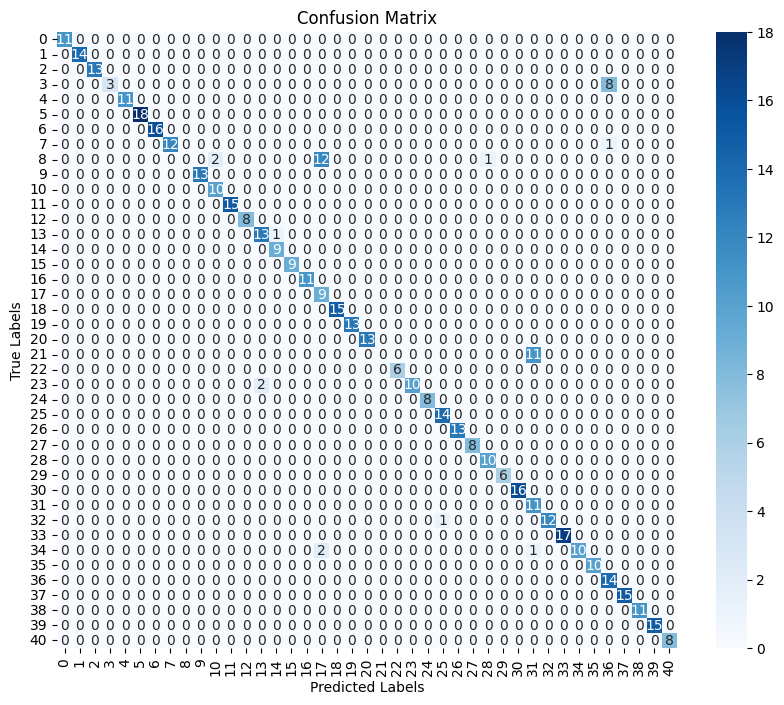

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Mengonversi prediksi dalam bentuk one-hot encoding menjadi label kelas
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.squeeze(y_test_encoded)

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels_encoded, y_pred_labels)

# Menentukan label kelas
class_labels = label_encoder.classes_

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Mengatur label sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan judul
plt.title('Confusion Matrix')

# Menampilkan gambar
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Konversi data training dan testing menjadi numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Inisialisasi dan latih model KNN
k = 9 # Jumlah tetangga terdekat yang dipertimbangkan
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Prediksi label kelas untuk data testing
y_pred = knn_model.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Mengubah label kelas prediksi menjadi numerik
label_encoder = LabelEncoder()
y_pred_labels_encoded = label_encoder.fit_transform(y_pred_labels)

# Memilih dua fitur untuk divisualisasikan
feature1 = X_test[:, 0]
feature2 = X_test[:, 1]

# Memplot titik-titik data dengan warna yang sesuai dengan kelas prediksi
plt.scatter(feature1, feature2, c=y_pred_labels_encoded, cmap='viridis')

# Menambahkan keterangan sumbu x dan y
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menampilkan plot
plt.show()


NameError: ignored